In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.optimizers import RMSprop
from keras.models import Sequential

In [96]:
df= pd.read_csv('/content/mnist_train.csv')

In [97]:
df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df.dropna(inplace=True)

In [99]:
target= df.iloc[:,0]

In [100]:
target

0        0
1        4
2        1
3        9
4        2
        ..
31560    9
31561    3
31562    4
31563    3
31564    9
Name: 5, Length: 31565, dtype: int64

In [101]:
features= df.iloc[:,1:].values.reshape(len(df),28,28,1)
features.shape

(31565, 28, 28, 1)

In [102]:
features

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [103]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [104]:
x_train.shape

(23673, 28, 28, 1)

In [105]:
y_train= keras.utils.to_categorical(y_train)
y_test= keras.utils.to_categorical(y_test)

In [106]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [107]:
epochs=5
batch_size=150
no_classes=10

## Build the Model

In [117]:
model=Sequential()
model.add(Conv2D(28,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(no_classes,activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 28)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 5488)              0         
                                                                 
 dense_30 (Dense)            (None, 300)               1646700   
                                                                 
 dense_31 (Dense)            (None, 10)                3010      
                                                                 
Total params: 1649990 (6.29 MB)
Trainable params: 1649990 (6.29 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [118]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics='accuracy')

In [119]:
history= model.fit(x_train,y_train,epochs=epochs, batch_size= batch_size,verbose=2, validation_data=(x_test,y_test))

Epoch 1/5
158/158 - 2s - loss: 10.8477 - accuracy: 0.8416 - val_loss: 0.2681 - val_accuracy: 0.9451 - 2s/epoch - 11ms/step
Epoch 2/5
158/158 - 1s - loss: 0.1350 - accuracy: 0.9637 - val_loss: 0.1590 - val_accuracy: 0.9587 - 741ms/epoch - 5ms/step
Epoch 3/5
158/158 - 1s - loss: 0.0531 - accuracy: 0.9842 - val_loss: 0.1159 - val_accuracy: 0.9719 - 717ms/epoch - 5ms/step
Epoch 4/5
158/158 - 1s - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.1115 - val_accuracy: 0.9755 - 711ms/epoch - 4ms/step
Epoch 5/5
158/158 - 1s - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.1115 - val_accuracy: 0.9783 - 724ms/epoch - 5ms/step


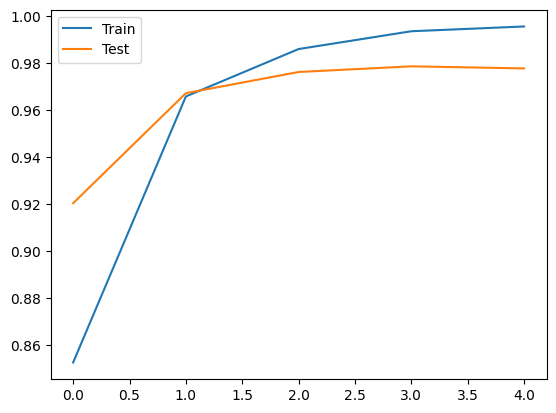

In [111]:
plt.plot(range(5),history.history['accuracy'],label='Train')
plt.plot(range(5),history.history['val_accuracy'],label='Test')
plt.legend()

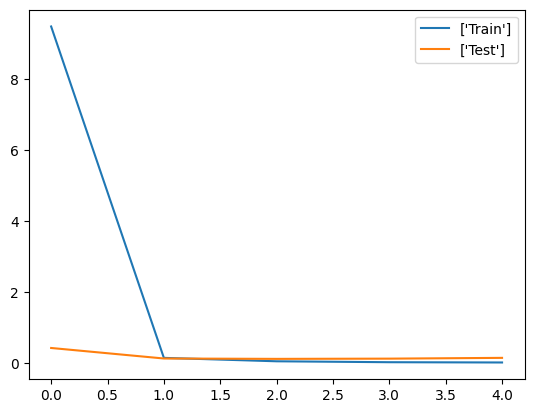

In [112]:
plt.plot(range(5),history.history['loss'],label=['Train'])
plt.plot(range(5),history.history['val_loss'],label=['Test'])
plt.legend()